In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline
train_data = pd.read_csv('/Users/lin/Desktop/Titanic/train.csv')
test_data = pd.read_csv('/Users/lin/Desktop/Titanic/test.csv')

In [2]:
sns.set_style('whitegrid')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_data.Embarked[train_data['Embarked'].isnull()]=train_data['Embarked'].dropna().mode().values

In [5]:
train_data.Cabin[train_data['Cabin'].isnull()]='U0'
# train_data['Cabin'] = train_data['Cabin'].fillna('U0')

In [6]:
from sklearn.ensemble import RandomForestRegressor
age_df = train_data[['Age','Pclass','SibSp','Fare','Parch']]

In [7]:
age_df_notnull = age_df[age_df['Age'].notnull()]
age_df_isnull = age_df[age_df['Age'].isnull()]

In [8]:
age_df_notnull[:5]

,Age,Pclass,SibSp,Fare,Parch
0,22.0,3,1,7.2500,0
1,38.0,1,1,71.2833,0
2,26.0,3,0,7.9250,0
3,35.0,1,1,53.1000,0
4,35.0,3,0,8.0500,0


In [9]:
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

In [10]:
RFR = RandomForestRegressor(n_estimators=1000,n_jobs=1)
RFR.fit(X,Y)
predictAges = RFR.predict(age_df_isnull.values[:,1:])


In [11]:
train_data.loc[train_data['Age'].isnull(),'Age']=predictAges

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
train_data.Age.describe()

count    891.000000
mean      29.651492
std       13.632921
min        0.420000
25%       21.000000
50%       29.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

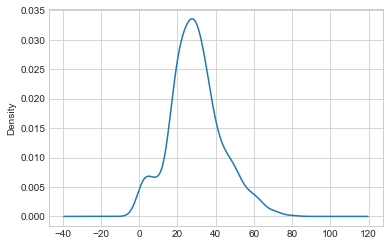

In [14]:
train_data.Age.plot(kind='kde')

In [15]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

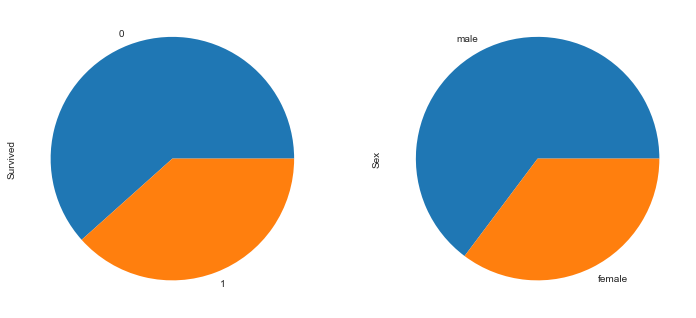

In [16]:
plt.figure(figsize=(12,8))
plt.subplot(121)
train_data['Survived'].value_counts().plot.pie()
plt.subplot(122)
train_data['Sex'].value_counts().plot.pie()

In [17]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

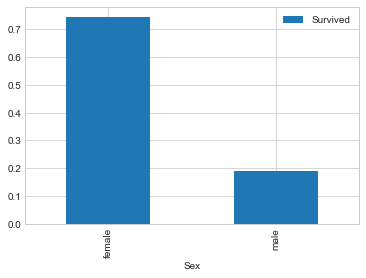

In [18]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

In [19]:
train_data[['Sex','Survived','Age']].groupby(['Sex','Survived']).mean()

Age
Sex    Survived           
female 0         24.013960
       1         29.029448
male   0         31.315727
       1         28.025023

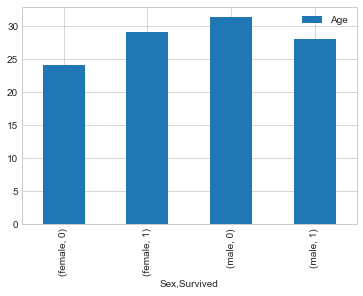

In [20]:
train_data[['Sex','Survived','Age']].groupby(['Sex','Survived']).mean().plot.bar()

In [21]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [22]:
train_data[['Sex','Pclass','Survived']].groupby(['Survived','Sex']).mean()

Pclass
Survived Sex             
0        female  2.851852
         male    2.476496
1        female  1.918455
         male    2.018349

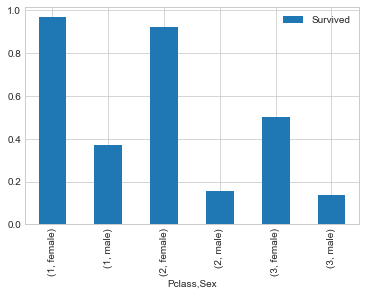

In [23]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [24]:
test =train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean()

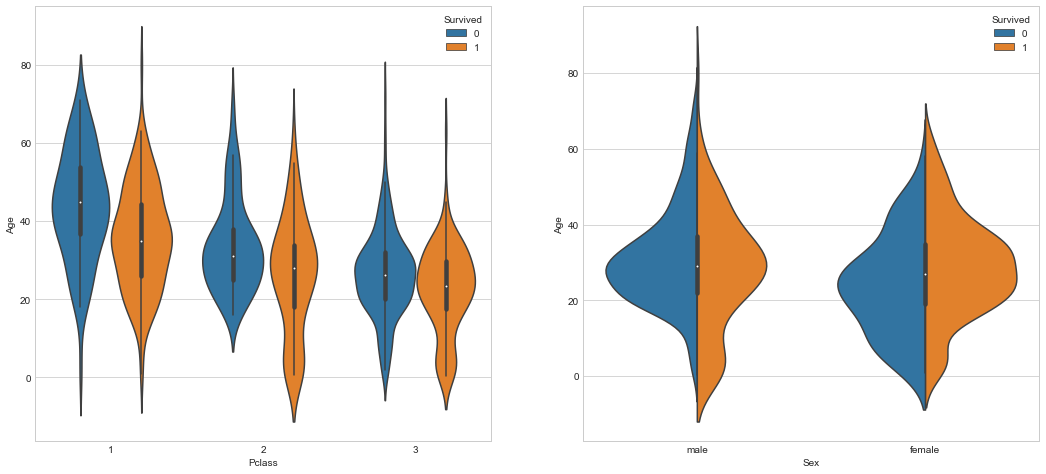

In [25]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=train_data, ax=ax[0])

sns.violinplot('Sex','Age',hue='Survived',data=train_data,ax=ax[1],split=True)

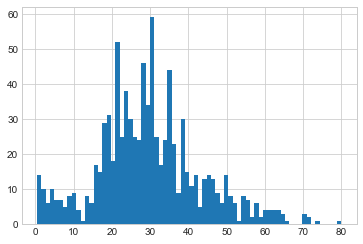

In [26]:
train_data['Age'].hist(bins=70)

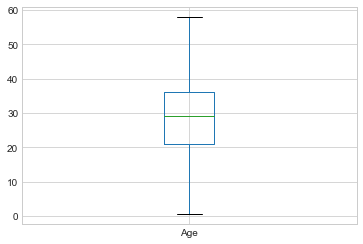

In [27]:
train_data.boxplot(column='Age',showfliers=False)

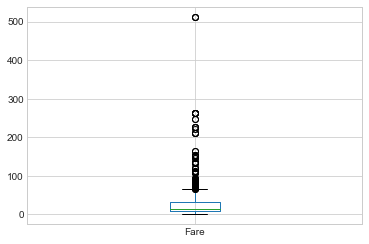

In [28]:
train_data.boxplot(column='Fare')

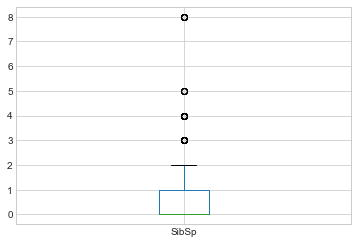

In [29]:
train_data.boxplot(column='SibSp')

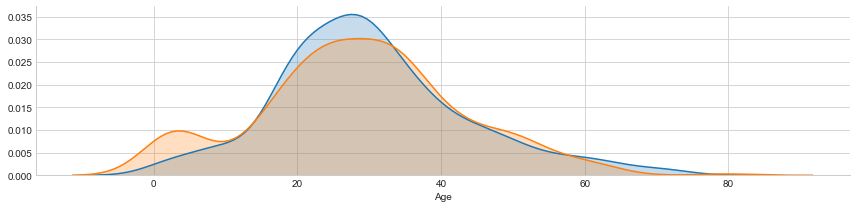

In [30]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)

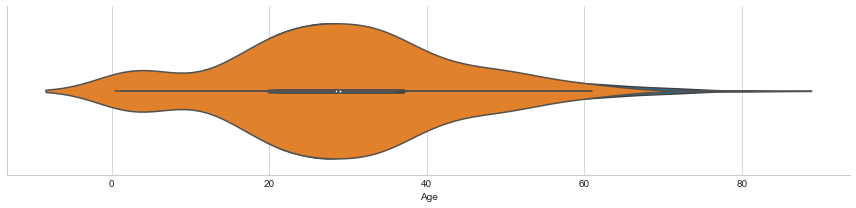

In [31]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4,legend_out=False)
facet.map(sns.violinplot,'Age')

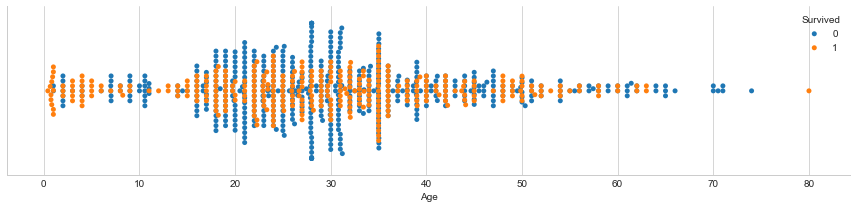

In [32]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4,legend_out=False)
facet.map(sns.swarmplot,'Age')
facet.add_legend()

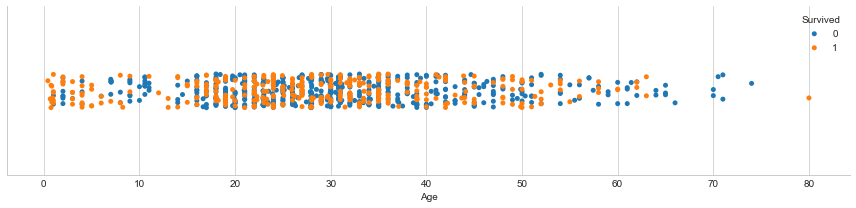

In [33]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4,legend_out=False)
facet.map(sns.stripplot,'Age',jitter=True)
facet.add_legend()

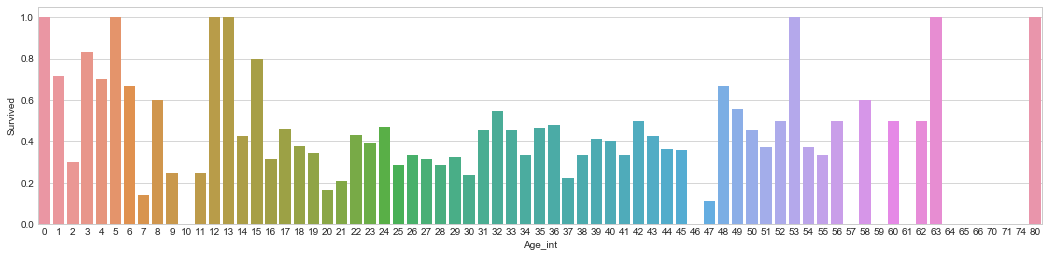

In [34]:
fig,axis1= plt.subplots(1,1,figsize=(18,4))
train_data['Age_int'] = train_data['Age'].astype(int)
average_age = train_data[['Age_int','Survived']].groupby(['Age_int'],as_index=False).mean()
sns.barplot('Age_int','Survived',data=average_age)

In [35]:
average_age = train_data[['Age_int','Survived']].groupby(['Age_int'],as_index=False).mean()
average_age[:4]

,Age_int,Survived
0,0,1.000000
1,1,0.714286
2,2,0.300000
3,3,0.833333


In [36]:
bins = [0,12,18,65,100]
train_data['Age_group'] =pd.cut(train_data['Age'],bins)

In [37]:
train_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,22,"(18, 65]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,"(18, 65]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,35,"(18, 65]"


In [38]:
by_age = train_data.groupby(['Age_group'])['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.416667
(18, 65]     0.369863
(65, 100]    0.125000
Name: Survived, dtype: float64

In [39]:
# ovz = all.groupby(['PM2.5','Zone'])['PM2.5_threshold'].mean()

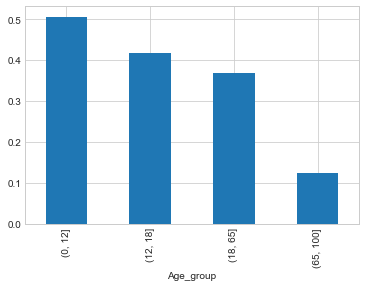

In [40]:
by_age.plot(kind='bar')

In [41]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [42]:
pd.crosstab( train_data['Title'], train_data['Sex'])[:5]

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6


In [43]:
 train_data['Name'][:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

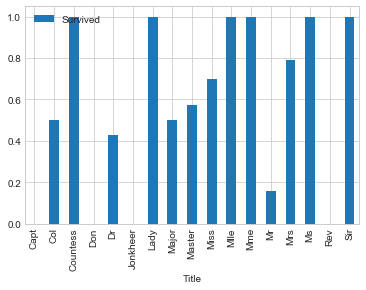

In [44]:
train_data[['Title','Survived']].groupby('Title').mean().plot.bar()

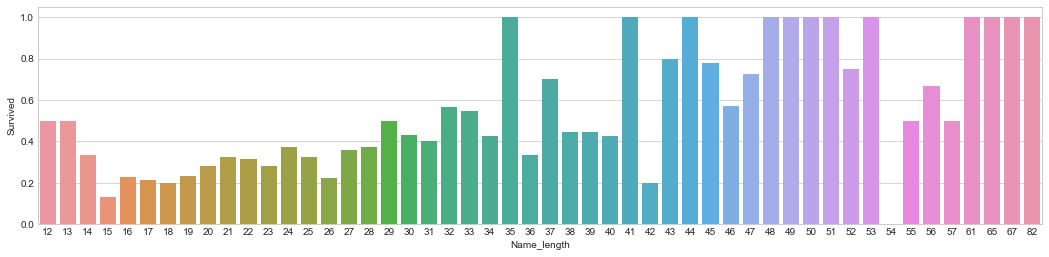

In [45]:
fig,axis1=plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby('Name_length',as_index=False).mean()
sns.barplot('Name_length','Survived',data=name_length)

In [46]:
name_length.sort_values(by='Name_length',ascending=False)

,Name_length,Survived
49,82,1.000000
48,67,1.000000
47,65,1.000000
46,61,1.000000
45,57,0.500000
44,56,0.666667
43,55,0.500000
42,54,0.000000
41,53,1.000000
40,52,0.750000


In [47]:
name_length

,Name_length,Survived
0,12,0.500000
1,13,0.500000
2,14,0.333333
3,15,0.133333
4,16,0.230769
5,17,0.214286
6,18,0.200000
7,19,0.234375
8,20,0.282051
9,21,0.325000


In [48]:
sibsp_df = train_data[train_data['SibSp']!=0]
no_sibsp_df = train_data[train_data['SibSp']==0]

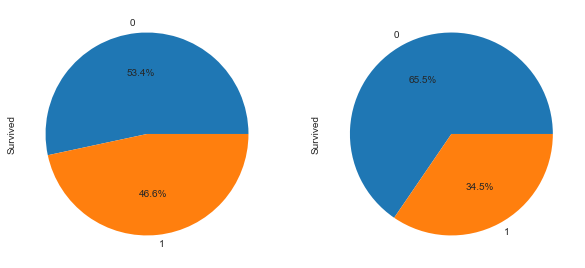

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(autopct='%1.1f%%')

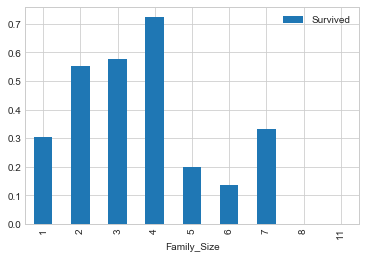

In [50]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family_Size','Survived']].groupby('Family_Size').mean().plot.bar()

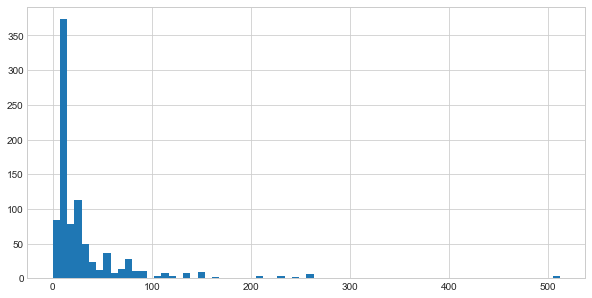

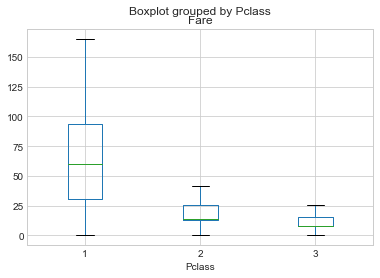

In [51]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins=70)

train_data.boxplot(column='Fare',by='Pclass',showfliers=False)

In [52]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

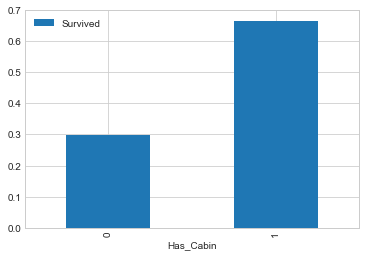

In [53]:
train_data.loc[train_data.Cabin.isnull(),'Cabin']='U0'
# train_data.Cabin[train_data['Cabin'].isnull()]='U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x=='U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

In [54]:
# train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x=='U0' else 1)

In [55]:
fare_not_survived = train_data['Fare'][train_data['Survived']==0]
fare_survived = train_data['Fare'][train_data['Survived']==1]
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])

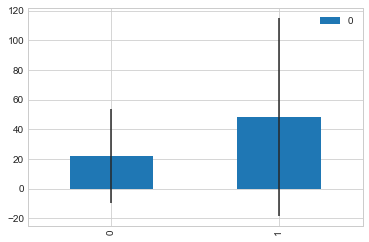

In [56]:
average_fare.plot(yerr=std_fare,kind='bar',use_index=True)

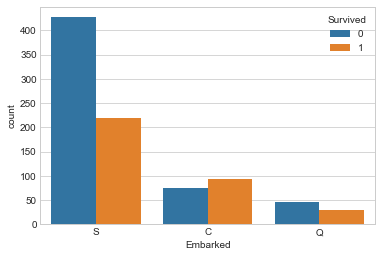

In [57]:
sns.countplot(x='Embarked',hue='Survived',data=train_data)

Text(0.5, 1.0, 'Embarked and Survived rate')

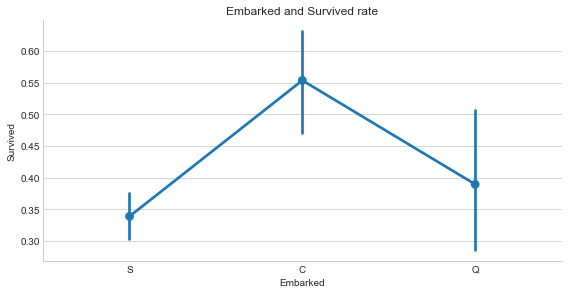

In [58]:
sns.factorplot('Embarked','Survived',data=train_data,aspect=2,size=4)
plt.title('Embarked and Survived rate')

In [59]:
fare_not_survived = train_data['Fare'][train_data['Survived']==0]
fare_survived = train_data['Fare'][train_data['Survived']==1]
average_age = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_age = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
average_age

,0
0,22.117887
1,48.395408


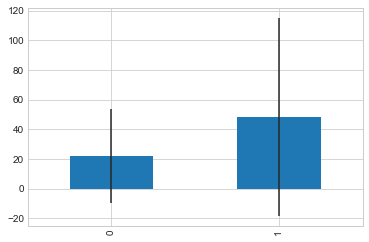

In [60]:
average_age.plot(yerr = std_age,kind='bar',legend=False)

In [61]:
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data  = train_data.join(embark_dummies)
train_data.drop(['Embarked'],axis=1,inplace=True)

In [62]:
train_data[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Age_int,Age_group,Title,Name_length,Family_Size,Has_Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,22,"(18, 65]",Mr,23,2,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,38,"(18, 65]",Mrs,51,2,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,26,"(18, 65]",Miss,22,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,35,"(18, 65]",Mrs,44,2,1,0,0,1


In [63]:
train_data[['S','Q','C']].head()

,S,Q,C
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [64]:
train_data.Cabin.unique()

array(['U0', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24'

In [65]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

In [66]:
train_data['Cabin'][train_data.Cabin.isnull()]='U0'
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

In [67]:
train_data['CabinLetter'][:6]

0    0
1    1
2    0
3    1
4    0
5    0
Name: CabinLetter, dtype: int64

In [68]:
from sklearn import preprocessing
assert np.size(train_data['Age']==891)
scaler = preprocessing.StandardScaler()
train_data['Age_Scale'] = scaler.fit_transform(train_data['Age'].values.reshape(-1,1))

In [69]:
train_data['Age_Scale']

0     -0.561566
1      0.612722
2     -0.267994
3      0.392543
4      0.392543
5     -0.420995
6      1.787011
7     -2.029427
8     -0.194601
9     -1.148711
10    -1.882641
11     2.080583
12    -0.708352
13     0.686115
14    -1.148711
15     1.860404
16    -2.029427
17     0.175464
18     0.098971
19    -0.000625
20     0.392543
21     0.319150
22    -1.075318
23    -0.121208
24    -1.589069
25     0.612722
26    -0.000625
27    -0.781745
28    -0.540971
29    -0.127379
         ...   
861   -0.634959
862    1.346653
863   -1.400675
864   -0.414780
865    0.906295
866   -0.194601
867    0.098971
868   -0.267517
869   -1.882641
870   -0.267994
871    1.273260
872    0.245757
873    1.273260
874   -0.121208
875   -1.075318
876   -0.708352
877   -0.781745
878   -0.127379
879    1.933797
880   -0.341387
881    0.245757
882   -0.561566
883   -0.121208
884   -0.341387
885    0.686115
886   -0.194601
887   -0.781745
888   -0.953611
889   -0.267994
890    0.172364
Name: Age_Scale, Length:

In [70]:
fare11 = train_data['Fare'][train_data['Survived']==0][train_data['Fare']>40]

In [71]:
len(fare11)
len(fare_not_survived)


549

In [72]:
train_data['Fare_bin'] = pd.qcut(train_data['Fare'],5)

In [73]:
train_data['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [74]:
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]

In [75]:
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_'+str(x))
train_data = pd.concat([train_data,fare_bin_dummies_df],axis=1)

In [76]:
fare_bin_dummies_df[:4]

,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1


In [77]:
train_data[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,S,CabinLetter,Age_Scale,Fare_bin,Fare_bin_id,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,-0.561566,"(-0.001, 7.854]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0.612722,"(39.688, 512.329]",1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,-0.267994,"(7.854, 10.5]",2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,1,0.392543,"(39.688, 512.329]",1,0,0,0,0,1


# 5. 特征工程

In [78]:
train_df_org = pd.read_csv('/Users/lin/Desktop/Titanic/train.csv')
test_df_org = pd.read_csv('/Users/lin/Desktop/Titanic/test.csv')

In [79]:
print(len(test_df_org.columns))
print(len(train_df_org.columns))

11
12


In [80]:
test_df_org['Survived']=0

combined_train_test = train_df_org.append(test_df_org)

PassengerId = test_df_org['PassengerId'] # For What?

In [81]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [82]:
combined_train_test.Embarked[combined_train_test.Embarked.isnull()]=combined_train_test.Embarked.dropna().mode().values
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)


In [83]:
combined_train_test['Embarked'].mode().iloc[0]

'S'

In [84]:
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]

In [85]:
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])

In [86]:
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)

In [87]:
combined_train_test[:5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,1,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,0,0


In [88]:
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)

In [89]:
# what is each person's title? 
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

In [90]:
combined_train_test['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Lady              1
Mme               1
Sir               1
the Countess      1
Don               1
Capt              1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [91]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)


In [92]:
combined_train_test['Title']=pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'],prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test,title_dummies_df],axis=1)

In [93]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

In [94]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

In [95]:
# train_data.Embarked[train_data.Embarked.isnull()]='U0'
# train_data['Embarked'] = train_data.Embarked.fillna('U0')
# train_data.loc[train_data.Embarked.isnull(),'Embarked'] = ''
# train_data.loc[train_data.Embarked]

In [96]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)

In [97]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)
combined_train_test['Fare_bin_id'] =pd.factorize(combined_train_test['Fare_bin'])[0]

fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id'],prefix=combined_train_test[['Fare_bin_id']].columns[0])
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df],axis=1)
combined_train_test.drop(['Fare_bin'],axis=1,inplace=True)

In [98]:
from sklearn.preprocessing import LabelEncoder

# 建立PClass Fare Category
def pclass_fare_category(df, pclass1_mean_fare, pclass2_mean_fare, pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'

Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]

# 建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args=(
    Pclass1_mean_fare, Pclass2_mean_fare, Pclass3_mean_fare), axis=1)
pclass_level = LabelEncoder()

# 给每一项添加标签
pclass_level.fit(np.array(
    ['Pclass1_Low', 'Pclass1_High', 'Pclass2_Low', 'Pclass2_High', 'Pclass3_Low', 'Pclass3_High']))

# 转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])

# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test, pclass_dummies_df], axis=1)


In [99]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

In [100]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)

le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                        prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)


In [101]:
combined_train_test[:5]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,0,1,2,2,0,0,1
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,0,2,2,0,0,1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,0,1,0,1,1,0,1,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,1,0,0,0,0,2,2,0,0,1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,0,1,0,1,1,0,1,0


In [128]:
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]


In [129]:
missing_age_df[:5]#numeric data

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
0,22.0,0,0,0,23,2,2,7.25000,0,0
1,38.0,1,1,1,51,2,2,35.64165,1,1
2,26.0,0,1,2,22,1,1,7.92500,2,0
3,35.0,0,1,1,44,2,2,26.55000,1,1
4,35.0,0,0,0,24,1,1,8.05000,2,0


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import model_selection

def fill_missing_age(missing_age_train,missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'],axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'],axis=1)
    
    #model gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=10, n_jobs=25, verbose=1,
                                                scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])

    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=10, n_jobs=25, verbose=1,
                                               scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

# two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])

    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)
    return missing_age_test

In [134]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    4.0s remaining:    4.0s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    4.0s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-130.295677599
GB Train Error for "Age" Feature Regressor:-64.6566961723
5     35.773942
17    31.489153
19    34.113840
26    28.621281
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:    1.8s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-119.094956052
RF Train Error for "Age" Feature Regressor-96.0603148448
5     33.459421
17    33.076798
19    34.855942
26    28.146718
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     30.000675
17    30.000675
19    30.000675
26    30.000675
Name: Age, dtype: float64


In [106]:
combined_train_test[['Ticket']][:5]

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


In [107]:
combined_train_test['Ticket_Letter']=combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

In [108]:
combined_train_test.loc[combined_train_test.Cabin.isnull(),'Cabin']='U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x=='U0' else 1)

In [109]:
combined_train_test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,22.0,0,0,7.250000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,1,2,2,0,0,1,0
1,38.0,1,1,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,2,2,0,0,1,1
2,26.0,0,0,7.925000,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,1,0,1,1,0,1,0,2
3,35.0,1,0,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,0,2,2,0,0,1,3
4,35.0,0,0,8.050000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,1,0,1,1,0,1,0,3
5,NaN,0,2,8.458300,"Moran, Mr. James",0,6,0,0,0,...,0,0,1,0,1,1,0,1,0,3
6,54.0,1,0,25.931250,"McCarthy, Mr. Timothy J",0,7,1,0,0,...,0,0,0,0,1,1,0,1,0,3
7,2.0,0,0,4.215000,"Palsson, Master. Gosta Leonard",1,8,0,0,3,...,0,0,0,1,5,0,1,0,0,3
8,27.0,0,0,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,0,1,0,...,0,0,0,1,3,2,0,0,1,3
9,14.0,0,1,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,...,1,0,0,0,2,2,0,0,1,3


# 特征间相关性分析

In [110]:
Correlation = pd.DataFrame(combined_train_test[
    ['Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass', 
     'Pclass_Fare_Category', 'Age', 'Ticket_Letter', 'Cabin']])

In [112]:
Correlation[:4]

,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass,Pclass_Fare_Category,Age,Ticket_Letter,Cabin
0,0,0,0,23,2,2,7.25000,0,0,5,22.0,0,0
1,1,1,1,51,2,2,35.64165,1,1,0,38.0,1,1
2,0,1,2,22,1,1,7.92500,2,0,4,26.0,2,0
3,0,1,1,44,2,2,26.55000,1,1,1,35.0,3,1


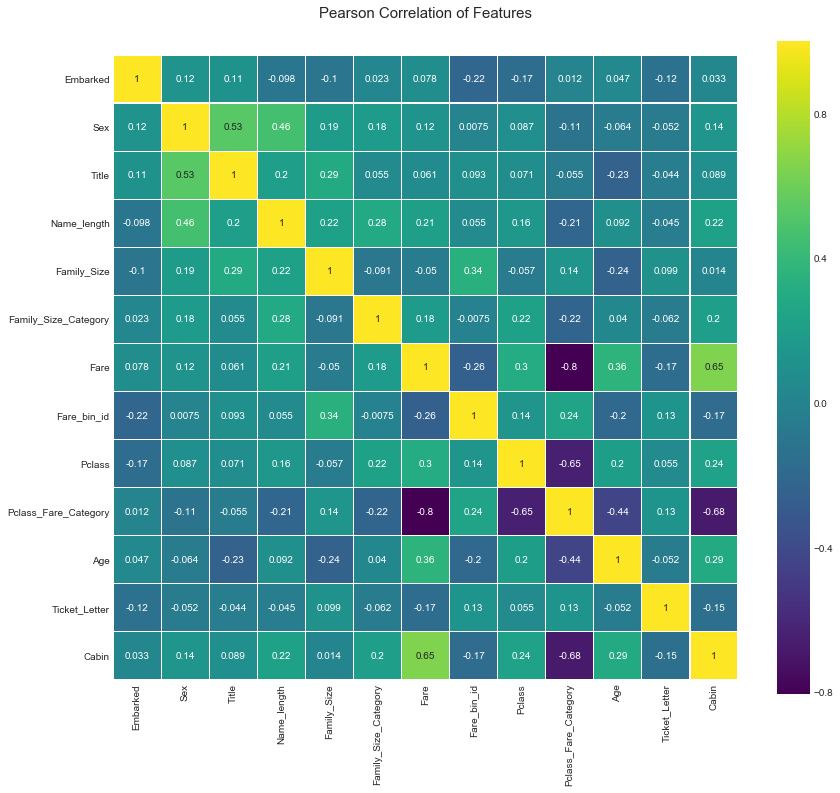

In [113]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

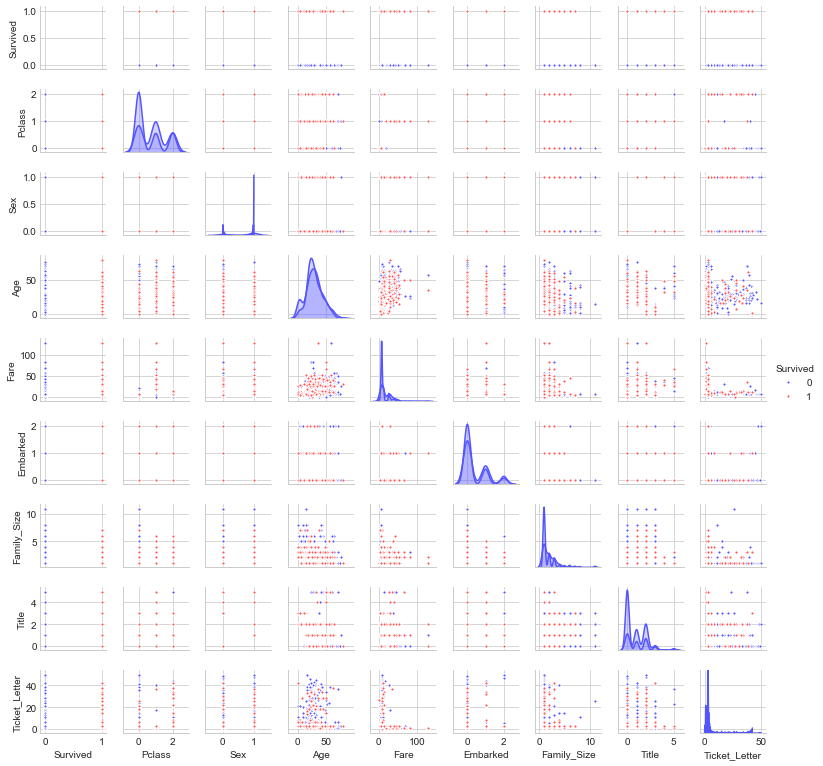

In [119]:
g = sns.pairplot(combined_train_test[[u'Survived', u'Pclass', u'Sex', u'Age', u'Fare', u'Embarked',
       u'Family_Size', u'Title', u'Ticket_Letter']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',
                 diag_kws=dict(shade=True),plot_kws=dict(s=10) )
# g.set(xticklabels=[])


In [136]:
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare', 'Name_length']])
combined_train_test[['Age','Fare', 'Name_length']] = scale_age_fare.transform(combined_train_test[['Age','Fare', 'Name_length']])


In [137]:
combined_data_backup = combined_train_test

In [138]:
combined_train_test.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Title', 'Fare_bin_id', 'Pclass_Fare_Category', 
                          'Parch', 'SibSp', 'Family_Size_Category', 'Ticket'],axis=1,inplace=True)

In [154]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

In [156]:
titanic_train_data_X.shape

(891, 32)

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):

    # random forest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [20]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
    rf_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Features from RF Classifier')
    print(str(features_top_n_rf[:10]))

    # AdaBoost
    ada_est =AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': ada_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Feature from Ada Classifier:')
    print(str(features_top_n_ada[:10]))

    #Extra Tree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [20]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best ET Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))

    # GradientBoosting
    gb_est =GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1], 'max_depth': [20]}
    gb_grid = model_selection.GridSearchCV(gb_est, gb_param_grid, n_jobs=25, cv=10, verbose=1)
    gb_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': gb_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))

    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split': [2, 4], 'max_depth': [20]}
    dt_grid = model_selection.GridSearchCV(dt_est, dt_param_grid, n_jobs=25, cv=10, verbose=1)
    dt_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': dt_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    #merge models


    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et, features_top_n_gb, features_top_n_dt], 
                               ignore_index=True).drop_duplicates()

    features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada, feature_imp_sorted_et, 
                                   feature_imp_sorted_gb, feature_imp_sorted_dt],ignore_index=True)

    return features_top_n , features_importance


In [164]:
combined_train_test.head(10)['Age']

0   -0.613832
1    0.628562
2   -0.303234
3    0.395613
4    0.395613
5    0.007417
6    1.870956
7   -2.166825
8   -0.225584
9   -1.235029
Name: Age, dtype: float64

In [165]:
feature_to_pick = 30
feature_top_n, feature_importance = get_top_n_features(titanic_train_data_X, titanic_train_data_Y, feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    9.1s remaining:    4.9s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    9.2s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.822671156004
Top N Features RF Train Score:0.979797979798
Sample 10 Features from RF Classifier
15      Name_length
0               Age
2              Fare
7             Sex_0
9           Title_0
8             Sex_1
27      Family_Size
3            Pclass
31    Ticket_Letter
11          Title_2
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    9.2s remaining:    4.9s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    9.2s finished


Top N Features Best Ada Params:{'learning_rate': 0.01, 'n_estimators': 500}
Top N Features Best Ada Score:0.81593714927
Top N Features Ada Train Score:0.820426487093
Sample 10 Feature from Ada Classifier:
9                    Title_0
2                       Fare
27               Family_Size
7                      Sex_0
28    Family_Size_Category_0
3                     Pclass
1                      Cabin
8                      Sex_1
15               Name_length
0                        Age
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   10.0s remaining:    5.4s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   10.0s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best ET Score:0.828282828283
Top N Features ET Train Score:0.971941638608
Sample 10 Features from ET Classifier:
9           Title_0
8             Sex_1
7             Sex_0
15      Name_length
0               Age
2              Fare
1             Cabin
31    Ticket_Letter
11          Title_2
10          Title_1
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   34.6s remaining:   18.6s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   35.5s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.789001122334
Top N Features GB Train Score:0.996632996633
Sample 10 Feature from GB Classifier:
0               Age
2              Fare
15      Name_length
31    Ticket_Letter
9           Title_0
27      Family_Size
23         Pclass_2
3            Pclass
18    Fare_bin_id_2
14          Title_5
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:    0.2s finished


Top N Features Best DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.784511784512
Top N Features DT Train Score:0.959595959596
Sample 10 Features from DT Classifier:
9           Title_0
0               Age
2              Fare
15      Name_length
27      Family_Size
14          Title_5
26         Pclass_5
3            Pclass
31    Ticket_Letter
23         Pclass_2
Name: feature, dtype: object


Text(0.5, 1.0, 'AdaBoost Feature Importance')

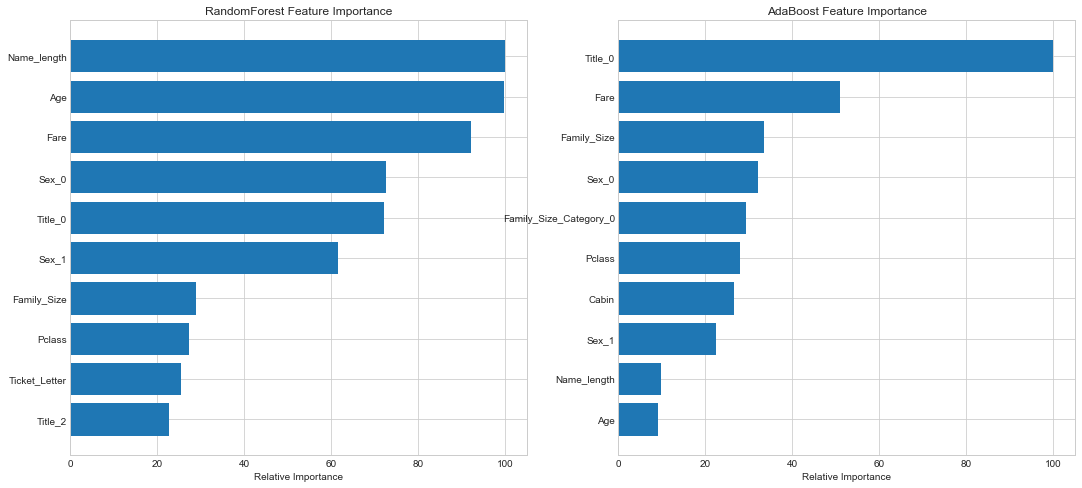

In [227]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')


In [257]:
from sklearn.model_selection import KFold

# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS, random_state=SEED, shuffle=False)

def get_out_fold(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


In [263]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,
                                min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)

et = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_depth=8, min_samples_leaf=2, verbose=0)

gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,max_depth=8,min_samples_leaf=2,verbose=0)

dt = DecisionTreeClassifier(max_depth=8)

knn = KNeighborsClassifier(n_neighbors =2)

svm = SVC(kernel='linear',C=0.025)

In [264]:
x_train = titanic_train_data_X.values
x_test = titanic_test_data_X.values
y_train = titanic_train_data_Y.values

In [265]:
# Create our OOF train and test predictions. These base results will be used as new features
rf_oof_train, rf_oof_test = get_out_fold(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_out_fold(ada, x_train, y_train, x_test) # AdaBoost 
et_oof_train, et_oof_test = get_out_fold(et, x_train, y_train, x_test) # Extra Trees
gb_oof_train, gb_oof_test = get_out_fold(gb, x_train, y_train, x_test) # Gradient Boost
dt_oof_train, dt_oof_test = get_out_fold(dt, x_train, y_train, x_test) # Decision Tree
knn_oof_train, knn_oof_test = get_out_fold(knn, x_train, y_train, x_test) # KNeighbors
svm_oof_train, svm_oof_test = get_out_fold(svm, x_train, y_train, x_test) # Support Vector

print("Training is complete")


Training is complete


In [266]:
x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
x_test = np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)

In [270]:
from xgboost import XGBClassifier
gbm = XGBClassifier(n_estimators=2000,max_depth=4,min_child_weight=2,gamma=0.9,subsample=0.8,
                   colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=1).fit(x_train,y_train)
predictions = gbm.predict(x_test)

In [272]:
predictions[:5]

array([0, 0, 0, 0, 1])

In [273]:
StackingSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})

In [275]:
StackingSubmission[:5]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [277]:
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                       n_jobs=1,train_sizes=np.linspace(.1,1.0,5),verbose=0):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes,train_scores,test_scores = learning_curve(
    estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std,alpha=0.1,
                    color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [280]:
X = x_train
Y = y_train


rf_parameters = {'n_jobs': -1, 'n_estimators': 500, 'warm_start': True, 'max_depth': 6, 'min_samples_leaf': 2, 
                 'max_features' : 'sqrt','verbose': 0}


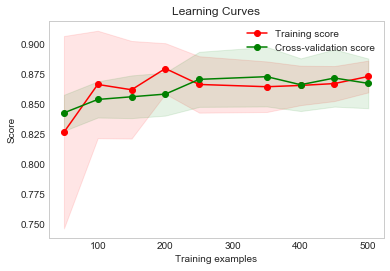

In [283]:
title = "Learning Curves"
plot_learning_curve(RandomForestClassifier(**rf_parameters), title, X, Y, cv=None,  n_jobs=4, train_sizes=[50, 100, 150, 200, 250, 350, 400, 450, 500])
plt.show()
